### FFT

In [46]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]=7,7

In [3]:
# data import
data = tifffile.imread("data/uNSGFP_Ecadhtomato_t15_20171109_105301/MAX_uNSGFP_Ecadhtomato_t15_t0000_w0001.tif")

In [19]:
# chekcing the shape

x,y,z = data.shape
x,y,z

(38, 1024, 1024)

In [21]:
# 2D FFT
data_fft=[]
for i in range(x):
    data_fft.append(np.fft.fft2(data[i,:,:]))
    
data_fft = np.array(data_fft)

In [22]:
# mean in time: <F(q) x F(q*)>t
fft_mean = np.mean(data_fft*np.conj(data_fft), axis=0)

In [23]:
fft_mean.max(),fft_mean.min()

((1.215355748003947e+18+0j), (9214283268.3433151+0j))

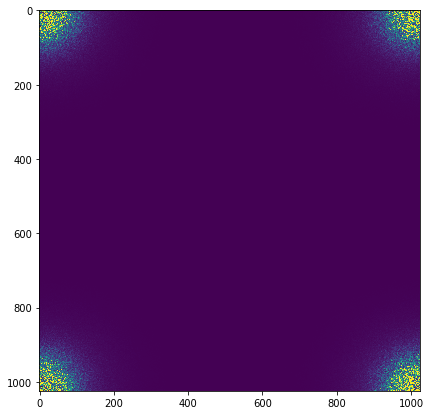

In [24]:
# img = np.fft.fft2(data[10,:,:])
img = np.real(fft_mean)
plt.imshow(img, vmax=1e13)

In [27]:
# FFT shift to the center
# data_shift = np.fft.fftshift(data_fft)
shiftedMean = np.fft.fftshift(fft_mean)

In [30]:
# fft_mean_shift = np.real(np.mean(data_shift*np.conj(data_shift), axis=0))
shiftedMeanAbs = np.abs(shiftedMean)

(<matplotlib.image.AxesImage at 0x10962e7b8>,
 <matplotlib.colorbar.Colorbar at 0x1093bfbe0>)

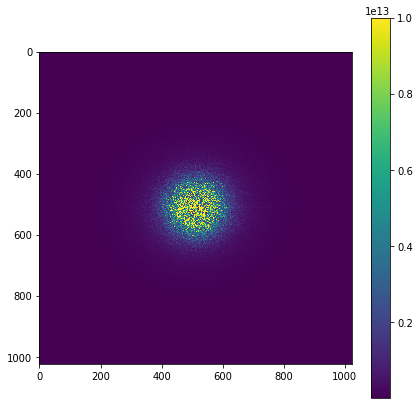

In [47]:
plt.imshow(shiftedMeanAbs, vmax=1e13), plt.colorbar()

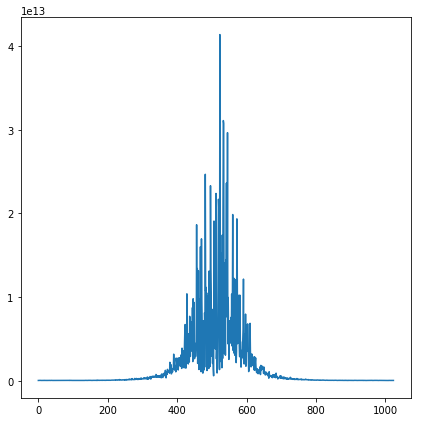

In [48]:
plt.plot(shiftedMeanAbs[500,:])

In [50]:
# radial profile

import numpy as np

def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

In [55]:
center = np.array(shiftedMeanAbs.shape)/2

In [56]:
center

array([ 512.,  512.])

In [58]:
rp = radial_profile(shiftedMeanAbs, center)

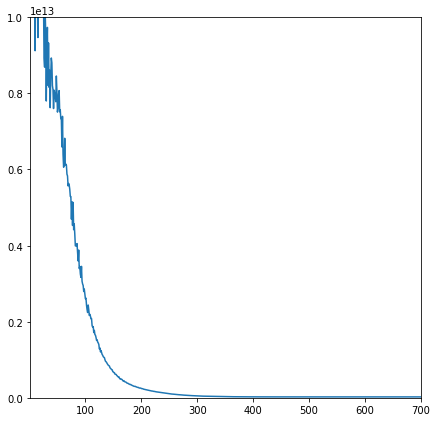

In [70]:
plt.ylim(0,1e13)
plt.xlim(1,700)
plt.plot(rp)

In [71]:
data_fft.shape

(38, 1024, 1024)

In [ ]:
fft_mean = np.mean(data_fft*np.conj(data_fft), axis=0)

In [82]:
def crossCorrAvg(data, tau=1):
    upLim = data.shape[0]//tau  - 1
    aux = np.array([data[i]*np.conj(data[i+tau]) for i in range(0,upLim,tau)])
    return np.abs(np.mean(np.fft.fftshift(aux), axis=0))
    

In [84]:
C1 = crossCorrAvg(data_fft, tau=1)
# shC1 = np.fft.fftshift(C)

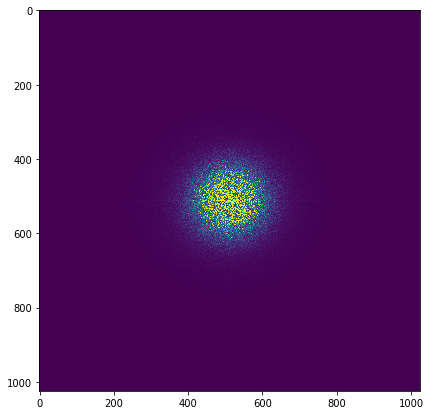

In [86]:
plt.imshow(C1, vmax=1e13)

In [87]:
C1rp = radial_profile(C1,center)

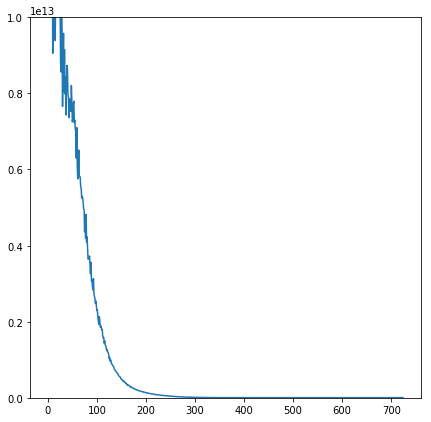

In [89]:
plt.ylim(0,1e13)
plt.plot(C1rp)

In [15]:
import gputools

[Errno 2] No such file or directory: '/Users/dibrov/.gputools'
<pyopencl.Device 'Iris Pro' on 'Apple' at 0x1024500>


In [16]:
xx = np.arange(-9,10,1)
sigma = 4.0

In [17]:
ga = np.exp(-xx*xx/(2*sigma*sigma))

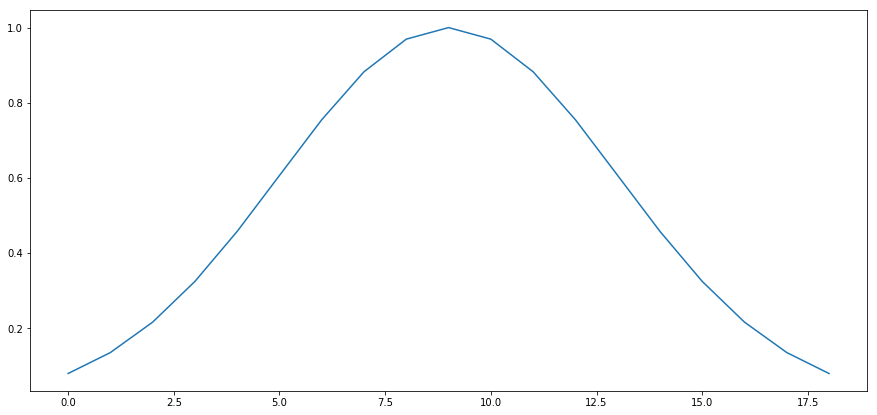

In [18]:
plt.plot(ga)

In [161]:
sm = gputools.convolve(img[0,:], ga)

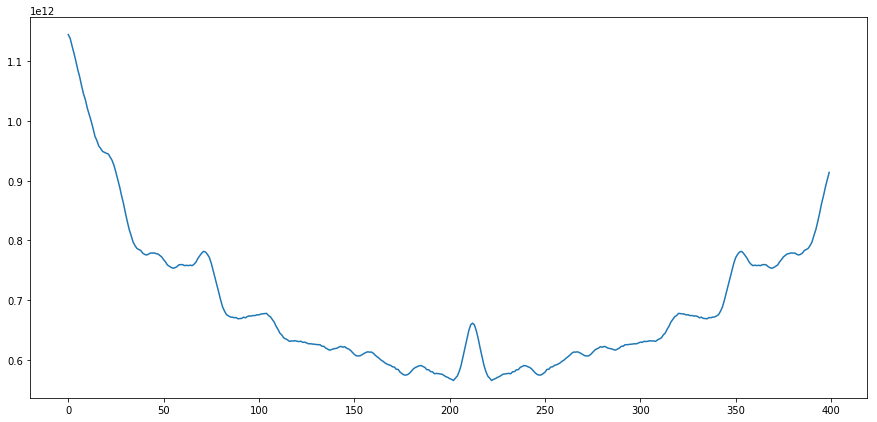

In [162]:
# axes = plt.gca()
# axes.set_ylim([0,1e14])
plt.plot(sm[300:700])

In [169]:
def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = nr #tbin / nr
    return radialprofile 

In [170]:
img_crop = img[0:512,0:512]

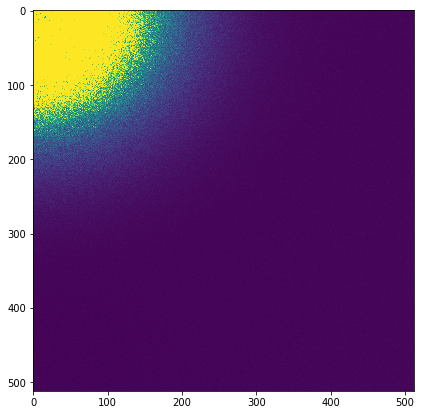

In [171]:
plt.imshow(img_crop, vmax=1e12)

In [172]:
center = np.array([0,0])

In [173]:
r = radial_profile(img_crop,center)

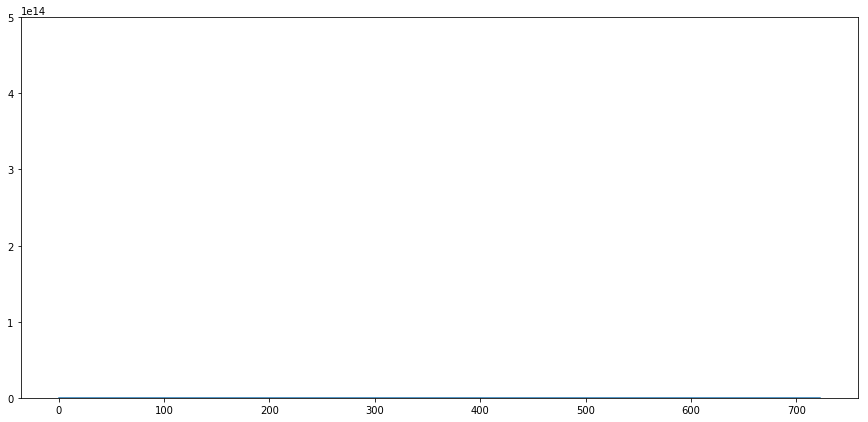

In [176]:
axes = plt.gca()
axes.set_ylim([2*1e10,5*1e12])
plt.plot(r)

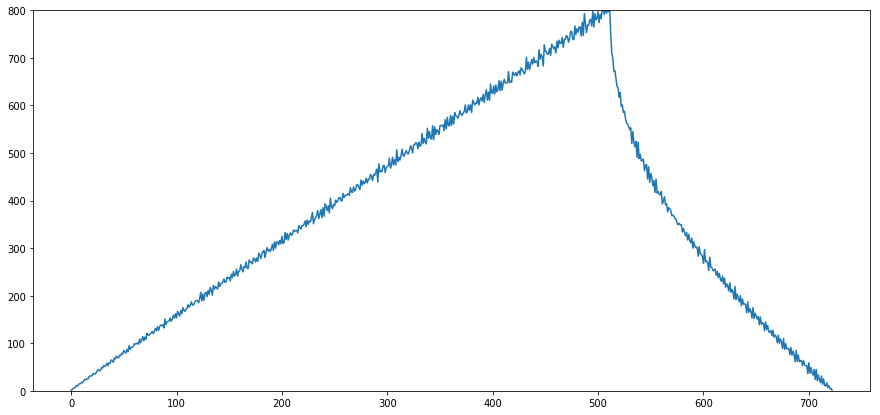

In [180]:
axes = plt.gca()
axes.set_ylim([0,800])
plt.plot(r)

In [179]:
r.max()

809

In [27]:
wing3 = tifffile.imread("../../data/franz/149_8bit/149_fused_normalized.tif")

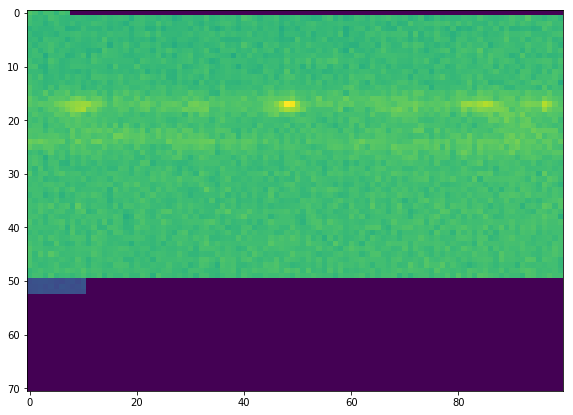

In [31]:
zx= np.mean(wing3[:,990:1010,700:800], axis=1)
plt.imshow(zx)

In [41]:
ind = np.indices((32,22))

In [42]:
ind

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ..., 
        [29, 29, 29, ..., 29, 29, 29],
        [30, 30, 30, ..., 30, 30, 30],
        [31, 31, 31, ..., 31, 31, 31]],

       [[ 0,  1,  2, ..., 19, 20, 21],
        [ 0,  1,  2, ..., 19, 20, 21],
        [ 0,  1,  2, ..., 19, 20, 21],
        ..., 
        [ 0,  1,  2, ..., 19, 20, 21],
        [ 0,  1,  2, ..., 19, 20, 21],
        [ 0,  1,  2, ..., 19, 20, 21]]])

In [45]:
ind.shape

(2, 32, 22)